# Task 6.2: ELECTRE for ranking problems

This notebook is prepared to practise with the model of outranking in MCDA. The method used is ELECTRE for ranking. Prepare a report to submit in the virtual campus.

Continue with the decision about cruises, but now we want a RANKING



In [15]:
%pip install mcda==0.4.1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=4969) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

Criteria: Capacity (number of people), Company (rating of quality), Facilities (number of additional services), Duration (days of the cruise) and Reviews (averages score of user's ratings).

The alternatives are:

* Id0: MED- Cruise on the Mediterranean
* Id1 : BALT - Cruise on Baltic Sea
* Id2 : CARIB - Cruise at the Caribean coast
* Id3 : GRE - Cruise in the Greek islands
* Id4 : NIL - Cruise in the Nile river
* Id5 : DAN - Cruise in the Danube river

Data is defined below. Weights indicate the relative voting power of each criterion in the concordance calculation.


In this implementation, it is required to define the scale of each criterion. There are quantitative (numerical) and qualitative (categorical) scales. This example uses only quantitative values. For each scale you must indicate the minimum possible value, the maximum one and the preference direction (MAX or MIN). A vector with the scales is needed as parameter in the ELECTRE functions.


In [17]:
scales = {
    "Capacity": QuantitativeScale(200, 1500, PreferenceDirection.MAX),
    "Company": QuantitativeScale(1, 10, PreferenceDirection.MAX),
    "Facilities": QuantitativeScale(1, 5, PreferenceDirection.MAX),
    "Duration": QuantitativeScale(5, 20, PreferenceDirection.MAX),
    "Reviews": QuantitativeScale(1, 10, PreferenceDirection.MAX)
}

In [18]:
alternatives = ["0.MED", "1.BALT", "2.CARIB", "3.GRE", "4.NIL", "5.DAN"]
criteria = {
    "Capacity": 0.2,
    "Company": 0.2,
    "Facilities": 0.1,
    "Duration": 0.3,
    "Reviews": 0.2
    }

performance_table = PerformanceTable(
                    [[900, 8, 5, 5, 3],
                     [1200, 9, 4, 10, 5],
                     [400, 7, 3, 14, 7],
                     [1000, 4, 2, 15, 9],
                     [700, 2, 5, 8, 9],
                     [1400, 7, 3, 14, 6]],
                     alternatives = alternatives,
                     criteria = criteria,
                     scales = scales)

performance_table.df

,Capacity,Company,Facilities,Duration,Reviews
0.MED,900,8,5,5,3
1.BALT,1200,9,4,10,5
2.CARIB,400,7,3,14,7
3.GRE,1000,4,2,15,9
4.NIL,700,2,5,8,9
5.DAN,1400,7,3,14,6


Q1. The ELECTRE method needs some discrimination thresholds to calculate the concordance. Explain the meaning of the values of thresholds in this case study.

In [19]:
#Indifference thresholds
q = {
    "Capacity": 100,
    "Company": 0,
    "Facilities": 0,
    "Duration": 2,
    "Reviews": 1
}

#Preference thresholds
p = {
    "Capacity": 200,
    "Company": 1,
    "Facilities": 2,
    "Duration": 4,
    "Reviews": 3
}

#Veto thresholds
v = {
    "Capacity": None,
    "Company": 3,
    "Facilities": None,
    "Duration": 6,
    "Reviews": None
}

Q2. To calculate the concordance with pseudo-criteria, we must use the version III of ELECTRE. Look at the values in the matrix and the plot and explain them. You can increase the cut value in the plotting function, to just see a subset of the arcs.

Q3. Reproduce manually the calculation of concordance between the alternatives MED and BALT.

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN
0.MED,1.00,0.20,0.50,0.5,0.65,0.30
1.BALT,0.95,1.00,0.60,0.5,0.75,0.50
2.CARIB,0.50,0.55,1.00,0.7,0.60,0.80
3.GRE,0.70,0.50,0.75,1.0,0.90,0.55
4.NIL,0.60,0.60,0.50,0.3,1.00,0.30
5.DAN,0.70,0.75,1.00,0.8,0.70,1.00


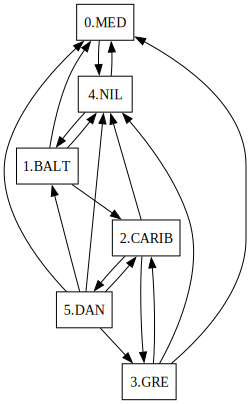

In [20]:
electre3 = Electre3(criteria_weights=criteria, preference_thresholds=p, indifference_thresholds=q, veto_thresholds=v, alpha=0.2, beta=-0.1)
concordance_matrix = electre3.concordance(performance_table)

display(concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.6
conc_mat_cut = concordance_matrix.where(concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(conc_mat_cut).plot()

Q4. After the concordance, the method calculates the discordance (using the veto thresholds). Explain the result obtained.

Q5. Reproduce manually the discordance between the alternatives MED and BALT.



In [23]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

discordance_matrix = electre3.discordance(performance_table)
discordance_matrix

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN
0.MED,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 0.0 Facilities 0.0 Duration 0.5 Reviews 0.0 dtype: float64,Capacity 0 Company 0 Facilities 0 Duration 1 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 1 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 1 Reviews 0 dtype: int64
1.BALT,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 0.0 Facilities 0.0 Duration 0.5 Reviews 0.0 dtype: float64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64
2.CARIB,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 0.5 Facilities 0.0 Duration 0.0 Reviews 0.0 dtype: float64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64
3.GRE,Capacity 0 Company 1 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 1 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 1.0 Facilities 0.0 Duration 0.0 Reviews 0.0 dtype: float64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 1.0 Facilities 0.0 Duration 0.0 Reviews 0.0 dtype: float64
4.NIL,Capacity 0 Company 1 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 1 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 1.0 Facilities 0.0 Duration 1.0 Reviews 0.0 dtype: float64,Capacity 0.0 Company 0.5 Facilities 0.0 Duration 1.0 Reviews 0.0 dtype: float64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 1.0 Facilities 0.0 Duration 1.0 Reviews 0.0 dtype: float64
5.DAN,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0.0 Company 0.5 Facilities 0.0 Duration 0.0 Reviews 0.0 dtype: float64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64,Capacity 0 Company 0 Facilities 0 Duration 0 Reviews 0 dtype: int64


The credibility step merges concordance with discordance. The following method makes the calculations internally, so the 3 thresholds are needed, together with weigths and scales.

Q6. What changes can you detect between the matrix of concordance and the matrix of credibility? Why do we have those changes? How many alternatives increase their concordance level? Why?



In [22]:
credibility_matrix = electre3.construct(performance_table)
credibility_matrix

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN
0.MED,1.00,0.125,0.0,0.0,0.65,0.0
1.BALT,0.95,1.000,0.6,0.5,0.75,0.5
2.CARIB,0.50,0.550,1.0,0.7,0.60,0.8
3.GRE,0.00,0.000,0.0,1.0,0.90,0.0
4.NIL,0.00,0.000,0.0,0.0,1.00,0.0
5.DAN,0.70,0.750,1.0,0.8,0.70,1.0


Introduce a plot to see the graph of Credibility of scores greater than 0.6. Observe the differences with respect to the graph of Concordance. Do they validate your previous answer?

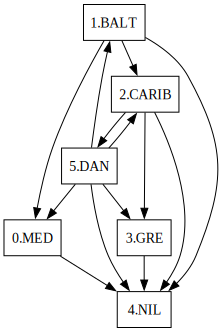

In [ ]:
cut_threshold = 0.6

cred_mat_cut = credibility_matrix.where(credibility_matrix >= cut_threshold, other=0) 

AdjacencyMatrix(cred_mat_cut).plot() 


The following code executes the ascending and descending distillation steps. With the two rankings obtained, it is then calculated the final ranking, which is a partial pre-order. It is called step by step, but you can also call directly to make the exploitation and see the ranking.

Plot shows you the preference ranking found at each distillation and then the partial pre-order graph.

Q7. Execute the code and explain the graphics.


[['1.BALT', '3.GRE', '4.NIL', '5.DAN'], ['0.MED', '2.CARIB']]


/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (


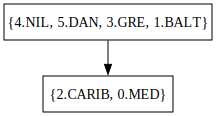

In [27]:
ascending = electre3.distillation(credibility_matrix, ascending=True)
print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()

[['1.BALT', '5.DAN'], ['0.MED', '2.CARIB', '3.GRE', '4.NIL']]


/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (


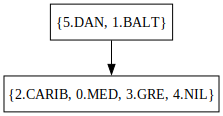

In [28]:
descending = electre3.distillation(credibility_matrix, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()

/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will rais

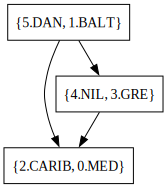

In [29]:
ranking = electre3.exploit(credibility_matrix)
ranking.graph_condensation.plot()

Q8. Introduce a new alternative in the dataset above (the one defined in question 1). It must be very good in the all criteria except in the duration, were it has a bad value of performance. Repeat the exercise and compare the results. Explain its relations in the credibility matrix and its position in the final ranking.


In [ ]:
alternatives = ["0.MED", "1.BALT", "2.CARIB", "3.GRE", "4.NIL", "5.DAN", "6.NEW"]

new_performance_table = PerformanceTable(
                    [[900, 8, 5, 5, 3],
                     [1200, 9, 4, 10, 5],
                     [400, 7, 3, 14, 7],
                     [1000, 4, 2, 15, 9],
                     [700, 2, 5, 8, 9],
                     [1400, 7, 3, 14, 6],
                     [1500, 10, 5, 5, 10]],
                     alternatives = alternatives,
                     criteria = criteria,
                     scales = scales)

new_performance_table.df

,Capacity,Company,Facilities,Duration,Reviews
0.MED,900,8,5,5,3
1.BALT,1200,9,4,10,5
2.CARIB,400,7,3,14,7
3.GRE,1000,4,2,15,9
4.NIL,700,2,5,8,9
5.DAN,1400,7,3,14,6
6.NEW,1500,10,5,5,10


Q9. What happens if we change the thresholds as indicated below?
Run again and compare the credibility matrix and the ranking obtained with the ones of question 10.
Explain the results and the motivation of the changes.

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN,6.NEW
0.MED,1.00,0.20,0.50,0.5,0.65,0.30,0.40
1.BALT,0.95,1.00,0.60,0.5,0.75,0.50,0.35
2.CARIB,0.50,0.55,1.00,0.7,0.60,0.80,0.30
3.GRE,0.70,0.50,0.75,1.0,0.90,0.55,0.50
4.NIL,0.60,0.60,0.50,0.3,1.00,0.30,0.60
5.DAN,0.70,0.75,1.00,0.8,0.70,1.00,0.50
6.NEW,1.00,0.70,0.70,0.7,0.85,0.70,1.00


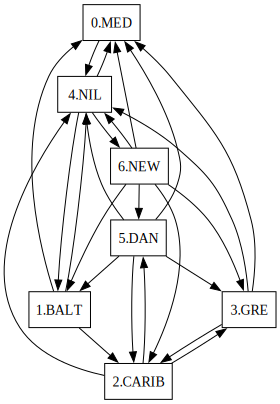

In [ ]:
new_concordance_matrix = electre3.concordance(new_performance_table)

display(new_concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.6
new_conc_mat_cut = new_concordance_matrix.where(new_concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(new_conc_mat_cut).plot()